In [1]:
import os
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'G:\\My Drive\\WGU\\WGU D212\\PA 1 - Clustering\\clustering'

In [3]:
medical_clean = pd.read_csv(filepath_or_buffer='G:\My Drive\WGU\WGU D212\PA 1 - Clustering\clustering\data\medical_clean.csv')
medical_clean

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,...,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,...,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,...,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,...,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [4]:
medical_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
categorical = medical_clean.select_dtypes(include='object')
numerical = medical_clean.select_dtypes(include=['int','float'])

In [6]:
categorical

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
0,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,Suburban,America/Chicago,"Psychologist, sport and exercise",Divorced,...,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work
1,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,Urban,America/Chicago,Community development worker,Married,...,Yes,No,No,No,No,No,No,Yes,No,Intravenous
2,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,Suburban,America/Chicago,Chief Executive Officer,Widowed,...,Yes,No,Yes,No,No,No,No,No,No,Blood Work
3,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,Suburban,America/Chicago,Early years teacher,Married,...,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work
4,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,Rural,America/New_York,Health promotion specialist,Widowed,...,No,No,No,Yes,No,No,Yes,No,No,CT Scan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,Urban,America/New_York,"Programmer, multimedia",Widowed,...,No,No,No,No,No,Yes,No,Yes,No,Intravenous
9996,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,Urban,America/New_York,"Restaurant manager, fast food",Widowed,...,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan
9997,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,Rural,America/Chicago,"Psychologist, occupational",Separated,...,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous
9998,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,Rural,America/Denver,Outdoor activities/education manager,Divorced,...,Yes,No,No,No,Yes,No,No,No,No,Blood Work


In [7]:
numerical

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,35621,34.34960,-86.72508,2951,1,53,86575.93,19.141466,6,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,32446,30.84513,-85.22907,11303,3,51,46805.99,18.940352,4,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,57110,43.54321,-96.63772,17125,3,53,14370.14,18.057507,4,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,56072,43.89744,-93.51479,2162,0,78,39741.49,16.576858,4,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,23181,37.59894,-76.88958,5287,1,22,1209.56,17.439069,5,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,27563,36.42886,-78.23716,4762,2,25,45967.61,16.980860,4,...,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,8340,39.43609,-74.87302,1251,4,87,14983.02,18.177020,5,...,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,37171,36.36655,-87.29988,532,3,45,65917.81,17.129070,4,...,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,57775,44.10354,-102.01590,271,3,43,29702.32,19.910430,5,...,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

normalized = scaler.fit_transform(numerical)
normalized_= pd.DataFrame(normalized, columns=numerical.columns)
normalized_.head()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,-1.731878,-0.529278,-0.814668,0.297134,-0.473168,-0.507129,-0.024795,1.615914,0.583603,0.944647,...,-0.727185,0.765005,-0.502755,-0.489673,-1.463247,-1.462128,0.488380,-0.506139,-0.483672,0.470420
1,-1.731531,-0.644866,-1.463305,0.395522,0.090242,0.417277,-0.121706,0.221443,0.483901,-0.967981,...,-0.513228,0.715114,-0.502755,0.476723,-0.494914,0.467946,0.488380,0.462548,-0.483672,-0.489033
2,-1.731185,0.253044,0.886966,-0.354788,0.482983,0.417277,-0.024795,-0.915870,0.046227,-0.967981,...,-1.319983,0.698635,-1.471828,0.476723,0.473418,0.467946,-0.482361,0.462548,-0.483672,-0.489033
3,-1.730838,0.215255,0.952530,-0.149403,-0.526393,-0.969332,1.186592,-0.026263,-0.687811,-0.967981,...,-1.460517,0.009004,-0.502755,1.443118,1.441750,-0.497091,0.488380,1.431236,1.474513,1.429874
4,-1.730492,-0.982165,-0.213252,0.943984,-0.315586,-0.507129,-1.526914,-1.377325,-0.260366,-0.011667,...,-1.467285,-1.408991,-1.471828,-2.422464,-0.494914,-0.497091,1.459121,-0.506139,0.495421,-0.489033


In [11]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_cluster = cluster.fit_predict(normalized_)

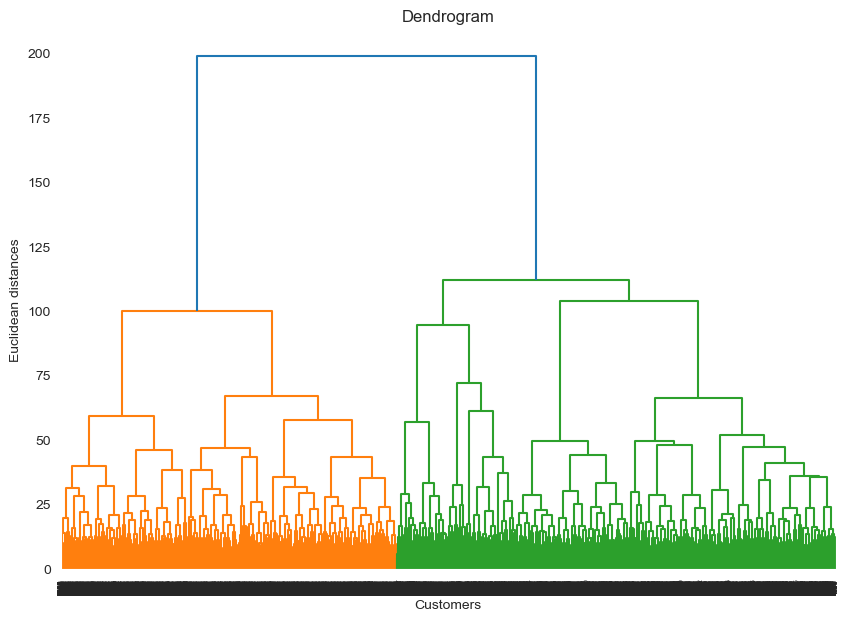

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Cluster
0,1,35621,34.34960,-86.72508,2951,1,53,86575.93,19.141466,6,...,17939.403420,3,3,2,2,4,3,3,4,0
1,2,32446,30.84513,-85.22907,11303,3,51,46805.99,18.940352,4,...,17612.998120,3,4,3,4,4,4,3,3,0
2,3,57110,43.54321,-96.63772,17125,3,53,14370.14,18.057507,4,...,17505.192460,2,4,4,4,3,4,3,3,0
3,4,56072,43.89744,-93.51479,2162,0,78,39741.49,16.576858,4,...,12993.437350,3,5,5,3,4,5,5,5,0
4,5,23181,37.59894,-76.88958,5287,1,22,1209.56,17.439069,5,...,3716.525786,2,1,3,3,5,3,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,27563,36.42886,-78.23716,4762,2,25,45967.61,16.980860,4,...,8927.642000,3,2,2,3,4,3,4,2,1
9996,9997,8340,39.43609,-74.87302,1251,4,87,14983.02,18.177020,5,...,28507.150000,3,3,4,2,5,3,4,4,1
9997,9998,37171,36.36655,-87.29988,532,3,45,65917.81,17.129070,4,...,15281.210000,3,3,3,4,4,2,3,2,1
9998,9999,57775,44.10354,-102.01590,271,3,43,29702.32,19.910430,5,...,7781.678000,5,5,3,4,4,3,4,3,1


In [13]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 7))

dendrogram = sch.dendrogram(sch.linkage(normalized_, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Assigning cluster labels to the original dataframe
numerical['Cluster'] = y_cluster
numerical